[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ManuelEspejo/Machine-Learning-Bases/blob/main/notebooks/01_Aprendizaje-Supervisado.ipynb) 👈🏻​ **Pulsar para abrir en Colab​**

# ¿Cómo usar estos notebooks?

Si este es el primer notebook que abres en este repositorio, te recomiendo que antes leas el [Manual de uso de estos notebooks](https://github.com/ManuelEspejo/Machine-Learning-Bases/blob/main/docs/manual-notebooks.md) que he creado para que te familiarices con el proyecto y las distintas rutas que puedes seguir, luego puedes volver aquí y continuar.

En este notebook, vamos a profundizar en par de ejemplos prácticos de aprendizaje supervisado.

Por otra parte, si aún no has revisado el notebook "[00_Empieza-aquí.ipynb](https://github.com/ManuelEspejo/Machine-Learning-Bases/blob/main/notebooks/00_Empieza-aquí.ipynb)", te sugiero que le eches un vistazo primero para conocer los conceptos básicos. Pero si ya tienes una idea clara de qué es el aprendizaje no supervisado y quieres verlo en acción, ¡estás en el lugar correcto!

# 01. Aprendizaje No Supervisado

El **Aprendizaje No Supervisado** es un tipo de Machine Learning donde el modelo trabaja con datos que no tienen etiquetas predefinidas para encontrar patrones, relaciones y estructuras en los datos. Es como explorar un bosque sin un mapa, dejando que los datos "hablen por sí mismos".

- En el aprendizaje supervisado, sabes cuál es la respuesta correcta (datos etiquetados).
- En el aprendizaje no supervisado, simplemente intentas encontrar una estructura significativa en los datos.

## ¿Por qué es importante?

En muchos casos del mundo real, los datos no vienen con etiquetas. Imagina los millones de interacciones de clientes en un sitio web: sería inviable etiquetar manualmente cada una. Aquí es donde entra el aprendizaje no supervisado para ayudarnos a:

- Agrupar clientes con comportamientos similares (clustering).
- Reducir la complejidad de datos con cientos de variables (reducción de dimensionalidad).
- Identificar comportamientos anómalos, como transacciones fraudulentas (detección de anomalías).

## ¿Qué vamos a ver?

A lo largo de este notebook, exploraremos las técnicas más comunes de aprendizaje no supervisado:

- **Clustering con K-Means**: Cómo agrupar datos según su similitud.
- **Reducción de Dimensionalidad con PCA**: Cómo simplificar datos complejos sin perder información clave.
- **Detección de Anomalías**: Cómo identificar datos que no siguen patrones normales.

> **📚 Recurso:** Si aún no has explorado el aprendizaje supervisado, te recomiendo revisar el notebook anterior: [01_Aprendizaje-Supervisado.ipynb](https://github.com/ManuelEspejo/Machine-Learning-Bases/blob/main/notebooks/01_Aprendizaje-Supervisado.ipynb). Esto te ayudará a entender mejor las diferencias y complementar ambas técnicas en tus proyectos.


**Empecemos**🚀

# Índice de Contenidos

1. **Clustering: Segmentación de Clientes**
   1.1. Descripción del Problema  
   1.2. Descargar el Dataset  
   1.3. Exploración y Preprocesamiento de Datos 
      1.3.1. Comprobación del Contenido del dataset
      1.3.2. Exploración Visual
   1.4. Selección de Características y Escalado  
   1.5. Implementación de K-Means  
      1.5.1. Configurar y entrenar el modelo K-Means con el número de clusters óptimo
   1.6. Análisis de calidad de los clusters
      1.6.1. Visualización de los clusters
      1.6.2. Interpretación de los Resultados del Clustering 
      1.6.3. Silhouette Score y Distancias internas
   1.7. Conclusión

2. 



## 1.1. Descripción del Problema

Imagina que trabajas en un centro comercial y quieres mejorar las estrategias de marketing personalizadas. Por ejemplo, podrías ofrecer promociones exclusivas según el tipo de cliente. Sin embargo, no tienes etiquetas predefinidas para identificar a tus clientes (como "comprador frecuente" o "cliente ocasional").

Aquí es donde entra en juego el **Clustering**, que nos ayudará a encontrar patrones y agrupar a los clientes según sus similitudes. Una vez definidos estos grupos, podrás diseñar estrategias específicas para cada segmento, como:

- Crear ofertas especiales para los clientes con alto potencial de gasto.
- Diseñar programas de fidelización para clientes con ingresos altos pero gasto moderado.

### Objetivos Específicos

1. **Dividir automáticamente a los clientes en grupos (clusters)** basados en su comportamiento de ingresos y gasto.
2. **Entender los patrones de comportamiento dentro de cada cluster**.
3. **Visualizar los resultados** para obtener insights útiles.

## 1.2. Descargar el Dataset

Para este ejemplo práctico, utilizaremos el dataset de [clientes de un centro comercial](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python), que está disponible públicamente en Kaggle.

Los datos que tenemos en este dataset son los siguientes:

- **Identificador del cliente**: Un identificador único para cada cliente.
- **Edad**: Edad del cliente.
- **Género**: Género del cliente.
- **Ingresos Anuales (k$)**: Los ingresos anuales en miles de dólares.
- **Puntuación de Gasto (1-100)**: Una métrica de qué tan activamente gasta un cliente en el centro comercial.

Para descargar el dataset, necesitas estar registrado en Kaggle. Para simplificar las cosas, he subido este dataset a una carpeta compartida de Google Drive, puedes descargarla ejecutando el código de abajo.


> **Nota:** Si estás usando Google Colab, los archivos se descargan en tu equipo de manera temporal mientras dure la sesión en el entorno de ejecución, luego se borrarán y todo quedará limpio, si quieres guardarlos en tu sistema, tienes que descargarlos manualmente.

In [35]:
# Importar librerías
import os
import sys

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [3]:
# Detectar si estamos en Colab
in_colab = 'google.colab' in str(get_ipython())

if in_colab:
    # Descargar el archivo helper_functions.py desde el repositorio de GitHub
    !mkdir -p /content/utils # Creamos una carpeta utils para que coincida con la estructura del repositorio
    !wget -O utils/helper_functions.py "https://raw.githubusercontent.com/ManuelEspejo/Machine-Learning-Bases/main/utils/helper_functions.py"
    data_dir = '/content/data' # Ruta de los datos
else:
    # Agregar el directorio raíz al path de Python (Para ejecutar en local)
    notebook_dir = os.path.dirname(os.path.abspath('__file__'))
    project_dir = os.path.dirname(notebook_dir)
    sys.path.append(project_dir)
    data_dir = '../data/raw'

In [4]:
from utils.helper_functions import *  # noqa: F403

# Descargamos los datos desde el enlace compartido de google Drive
download_data('https://drive.google.com/uc?id=1J0xQpKr-UWiA7dxnIFfyOL0i9gR1wefd')

Descargando desde Google Drive...
Tamaño del archivo ZIP: 1583 bytes
Contenido del ZIP: ['Mall_Customers.csv']

Archivos disponibles:
- bike_buyers.csv (87182 bytes)
- bike_buyers_clean.csv (86348 bytes)
- CC GENERAL.csv (902879 bytes)
- customer_feedback_satisfaction.csv (1963795 bytes)
- Mall_Customers.csv (3981 bytes)


## 1.3. Exploración y Preprocesamiento de Datos

In [5]:
# Cargar el dataset
data = pd.read_csv(data_dir + '/Mall_Customers.csv')

# Mostrar las primeras filas del dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


¡Hora de conocer a nuestros clientes! Este dataset nos da una visión de dos aspectos clave:

- `Annual Income (k$)`: Una métrica que nos dice cuánto ganan nuestros clientes al año (en miles de dólares).
- `Spending Score (1-100)`: Una puntuación que refleja qué tan fans son de las compras en este centro comercial, desde compradores ocasionales hasta quienes casi tienen su nombre grabado en la puerta de entrada.

Estas dos variables nos permitirán ver patrones interesantes y crear grupos de clientes con características similares.

### 1.3.1. Comprobación del contenido del dataset

Vamos a echar un vistazo rápido para conocer a fondo a nuestros datos antes de ponernos manos a la obra:

In [6]:
# Información general del dataset
print("Información general del dataset:")
data.info()
print("*" * 50)

# Resumen estadístico de las columnas numéricas
print("Resumen estadístico de las columnas numéricas:")
print(data.describe())
print("*" * 50)

# Verificar si hay valores faltantes
print("Valores faltantes por columna:")
print(data.isnull().sum())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
**************************************************
Resumen estadístico de las columnas numéricas:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000      

#### Resumen de los datos

- **¿Qué tenemos aquí?**
  - 200 clientes únicos que vienen con la siguiente información: ID, género, edad, ingresos anuales y puntuación de gasto.
  - 0 valores faltantes.
- **Tipos de datos:**
  - Numéricos (`int64`) para los elementos cuantitativos como edad, ingresos y puntuaciones.
  - Categóricos (`object`) para los elementos cualitativos como el género.
- **Pequeño vistazo estadístico:**
  - **Edad:** Desde los adolescentes hasta los experimentados (18-70 años), con un promedio de 39 años. Perfecto para analizar tendencias generacionales.
  - **Ingresos anuales:** Entre 15k y 137k dólares. Esto nos da una pista de la diversidad económica.
  - **Puntuación de gasto:** De 1 a 99, demostrando que algunos clientes necesitan un empujón en su fidelidad y otros ya tienen la tarjeta de crédito echando humo.

#### Análisis rápido

Las variables `Annual Income` y `Spending Score` tienen un rango diferente, si no las tratamos con cuidado, el algoritmo podría darle más importancia a los ingresos simplemente porque los números son más grandes. 🤷‍♂️

La buena noticia es que podemos arreglar esto con un simple escalado de los datos.

### 1.3.2. Exploración Visual

¡Vamos con los gráficos!

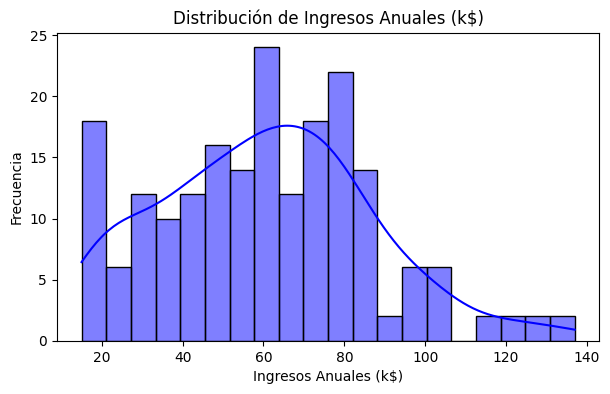

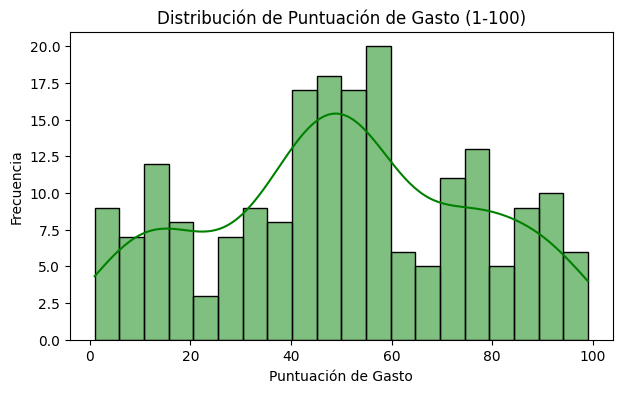

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de Annual Income
plt.figure(figsize=(7, 4))
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True, color='blue')
plt.title('Distribución de Ingresos Anuales (k$)')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Spending Score
plt.figure(figsize=(7, 4))
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True, color='green')
plt.title('Distribución de Puntuación de Gasto (1-100)')
plt.xlabel('Puntuación de Gasto')
plt.ylabel('Frecuencia')
plt.show()


#### Observaciones sobre las distribuciones

1. **Distribución de Ingresos Anuales (k$)**:
   - La mayoría de los clientes están en el rango medio (60k-80k), con algunos picos en extremos bajos y altos.
   - ¿Qué aprendemos? Saber cuánto gana alguien nos ayuda a personalizar ofertas y segmentar de manera más precisa.
2. **Distribución de Puntuación de Gasto (1-100)**:
   - Este gráfico es más como una montaña rusa, con picos y valles que nos dicen cómo se comportan los clientes.
   - Importante para identificar quién es un cliente estrella y quién necesita una promoción especial para animarse.


## 1.4. Selección de Características y Escalado

Ahora es el momento de decidir qué ingredientes queremos en nuestra receta de clustering. Como queremos mantener las cosas simples y significativas, elegiremos solo dos variables:

- `Annual Income (k$)`
- `Spending Score (1-100)`

¿Por qué dejamos fuera cosas como el género o la edad?

Porque queremos un análisis limpio y enfocarnos en patrones económicos y de comportamiento. Más adelante, profundizaremos en el análisis con el dataset completo.

In [8]:
# Seleccionar las columnas relevantes
selected_data = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# Visualizar las características escaladas
print(selected_data[:5])

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


**Un detalle importante:**

El algoritmo **K-Means** utiliza distancias para asignar puntos a clusters (agrupaciones). Essto significa que, si una variable tiene números más altos, será la que reciba toda su atención, dejando un poco de lado la otra, pero nosotros queremos que tengan el mismo protagonismo

Los rangos de nuestros datos:

- `Annual Income`: De 15 a 137 (en miles de dólares).
- `Spending Score`: De 1 a 99.

Aunque no están tan lejos, esa pequeña diferencia puede ser suficiente para sesgar los clusters hacia los ingresos. Entonces, usaremos el poderoso `StandardScaler` de `sklearn` para que las variables tengan una pelea justa. ¿Cómo funciona? Escala los datos de forma que:

- La media sea 0.
- La desviación estándar sea 1.

Eso significa que todos los valores ahora son comparables en términos de desviaciones estándar. Por ejemplo, si ves un valor de +2.5 en Annual Income, significa que ese cliente está ganando mucho más que el promedio. En cambio, un -1.7 en Spending Score indicaría un cliente menos propenso a gastar que la media.

Es justo lo que necesitamos para que el clustering sea imparcial y preciso.

In [9]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos seleccionados
scaled_data = scaler.fit_transform(selected_data)

# Convertir a DataFrame para facilitar la interpretación
scaled_df = pd.DataFrame(scaled_data, columns=["Annual Income (k$)", "Spending Score (1-100)"])
scaled_df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


#### Visualizando los datos escalados

Vamos a observar un gráfico de dispersión que muestra cómo se relacionan estas variables después del escalado:

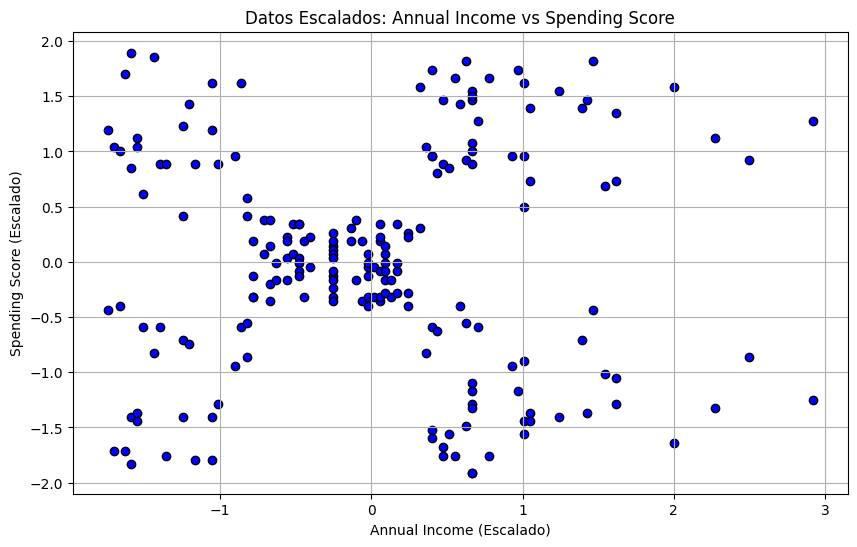

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df["Annual Income (k$)"], scaled_df["Spending Score (1-100)"], c="blue", edgecolor="k")
plt.title("Datos Escalados: Annual Income vs Spending Score")
plt.xlabel("Annual Income (Escalado)")
plt.ylabel("Spending Score (Escalado)")
plt.grid()
plt.show()

- **Arriba a la derecha:** Clientes VIP: Ganancias altas, gastos altos. ¡Marketing premium, aquí vamos!
- **Abajo a la derecha:** Ahorradores: Ganancias altas, pero poca inclinación a gastar.
- **Abajo a la izquierda:** Clientes en modo zen: Bajos ingresos y bajos gastos.
- **Arriba a la izquierda:** Amantes de las ofertas: Ingresos modestos, pero con un buen historial de compras.

También podemos ver puntos en el centro; nuestros clientes promedio.

## 1.5. Implementación de K-Means

**¿Qué es K-Means?**

Imagina que estás organizando una estantería llena de libros desordenados. Tu objetivo es agruparlos según características comunes (autor, género, tamaño). K-Means hace algo similar con los datos: encuentra similitudes y crea grupos o "clusters". Cada grupo tiene un centroide, que es el "promedio" que representa al grupo (el centro de su grupo).

**¿Cómo funciona?**

1. **Elegir el número de clusters (k):** Decidimos cuántos grupos queremos crear.
2. **Inicializar los centroides:** El algoritmo selecciona k puntos al azar para empezar.
3. **Asignar puntos a clusters:** Cada punto del dataset se asigna al cluster cuyo centroide esté más cerca. Aquí usamos la distancia euclidiana, que mide la cercanía entre puntos en el espacio.
4. **Actualizar los centroides:** Recalculamos los centroides con base en los puntos asignados.
5. **Repetir hasta converger:** Este proceso se repite hasta que los centroides se estabilicen o se alcance un número máximo de iteraciones.

¡Y listo! Al final, cada dato pertenece al cluster que mejor lo representa.

### 1.5.1. Configurar y entrenar el modelo K-Means con el número de clusters óptimo

El desafío aquí es elegir el número correcto de clusters (`k`). Un `k` demasiado alto creará grupos innecesarios, mientras que un `k` muy bajo mezclará cosas que no deberían estar juntas.

**Método del Codo 💪 (Elbow Method)**

Aquí entra en juego el método del codo, nuestra técnica para encontrar el número óptimo de clusters. Este método mide la "inercia" (qué tan compactos están los clusters) y observa cómo disminuye al aumentar `k`.

En el gráfico, buscamos el punto donde la mejora empieza a ser mínima (el famoso "codo"). Este es nuestro `k` ideal: ni demasiado alto, ni demasiado bajo, sino justo en el equilibrio perfecto.

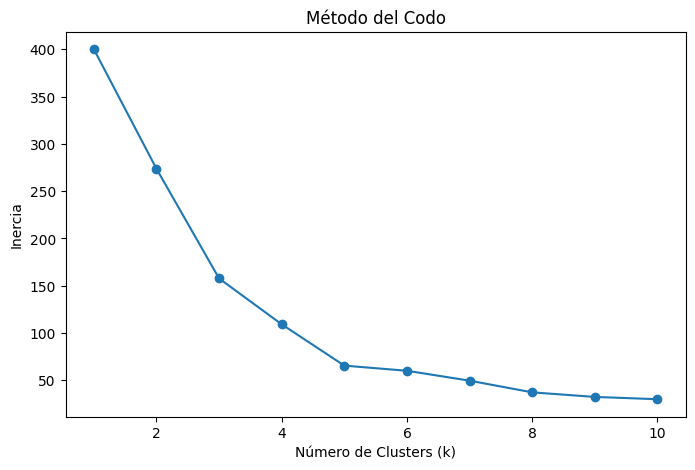

In [11]:
# Método del Codo
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.show()


En este caso, nuestro "codo" nos sugiere que 5 clusters son una buena opción.

In [12]:
# Configurar el modelo K-Means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Entrenar el modelo con los datos escalados
kmeans.fit(scaled_data)

# Asignar cada punto de datos a un cluster
clusters = kmeans.labels_

# Añadir las etiquetas de los clusters al dataset seleccionado
selected_data["Cluster"] = clusters

# Mostrar las primeras filas con los clusters asignados
selected_data.head()


/tmp/ipykernel_8704/1756536998.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["Cluster"] = clusters


,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


## 1.6. Análisis de calidad de los clusters

Antes de concluir con este apartado, evaluaremos la calidad de los clusters generados para asegurarnos de que son representativos y útiles.

### 1.6.1. Visualización de los clusters

Nada como un buen gráfico para ver cómo se forman los clusters. Una vez que el modelo está entrenado, trazamos los datos en 2D, con los centroides marcados, para entender cómo se agrupan nuestros clientes.


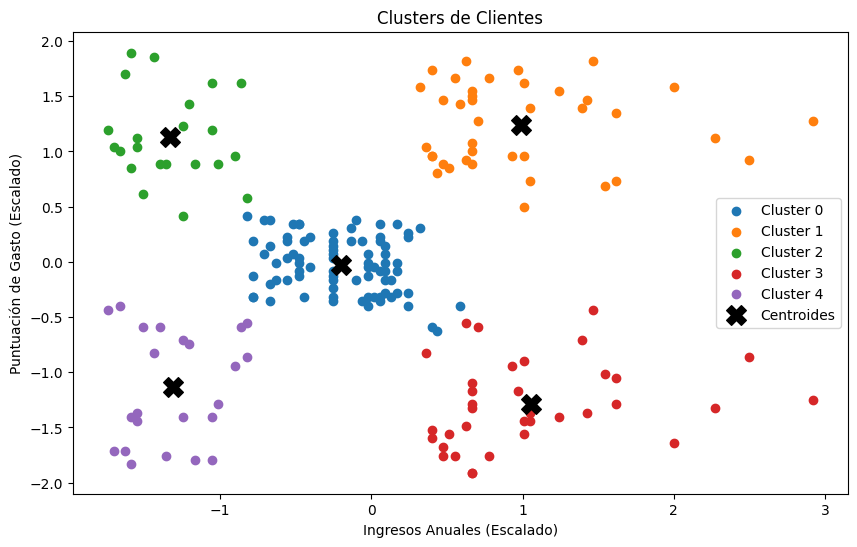

In [13]:
# Visualizar los clusters
plt.figure(figsize=(10, 6))
for cluster in range(kmeans.n_clusters):
    plt.scatter(
        scaled_df[kmeans.labels_ == cluster]["Annual Income (k$)"],
        scaled_df[kmeans.labels_ == cluster]["Spending Score (1-100)"],
        label=f"Cluster {cluster}"
    )
    
# Añadir los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c="black", marker="X", label="Centroides")

plt.title("Clusters de Clientes")
plt.xlabel("Ingresos Anuales (Escalado)")
plt.ylabel("Puntuación de Gasto (Escalado)")
plt.legend()
plt.show()


### 1.6.2. Interpretación de los Resultados del Clustering

Cada cluster cuenta una historia única sobre los clientes. Aquí están los perfiles y las estrategias recomendadas (esto no es una regla fija, es solo una sugerencia que hago en base a las observaciones de los datos, y es muy mejorable):

| **Cluster**  | **Perfil**                       | **Estrategia Clave**                                   |
|--------------|----------------------------------|-------------------------------------------------------|
| **Cluster 0** | Clientes promedio (centro)       | Servicios estándar para mantener el interés.          |
| **Cluster 1** | Clientes VIP (altos ingresos y gasto) | Experiencias exclusivas y programas de fidelización.  |
| **Cluster 2** | Activos económicos (ingresos modestos, alto gasto) | Promociones económicas y descuentos.                 |
| **Cluster 3** | Potenciales (altos ingresos, bajo gasto) | Incentivos para aumentar la interacción y el gasto.  |
| **Cluster 4** | Discretos (bajos ingresos y bajo gasto) | Estrategias simples y accesibles.                    |

Con esta tabla, podemos simplificar las acciones necesarias para cada grupo, facilitando la toma de decisiones estratégicas.  


### 1.6.3. Silhouette Score y Distancias internas

Aunque la visualización nos da una buena idea de cómo están distribuidos los clusters, es hora de apoyarnos en métricas más objetivas para evaluar su calidad. Aquí entran dos grandes aliados: el **Silhouette Score** y las **Distancias internas**.

#### Silhouette Score

Esta métrica nos dice qué tan bien definidos están nuestros clusters y qué tan separados están unos de otros. Su rango va de -1 a 1:

- Un valor cercano a 1 indica clusters compactos y bien diferenciados.
- Un valor cercano a 0 sugiere que los clusters se superponen.
- Valores negativos implican puntos asignados al cluster incorrecto.

In [14]:
# Calcular el Silhouette Score
silhouette_avg = silhouette_score(scaled_df, selected_data["Cluster"])
print(f"Silhouette Score Promedio: {silhouette_avg:.2f}")

Silhouette Score Promedio: 0.55


En nuestro caso, obtenemos un promedio de 0.55. No es espectacular, pero es aceptable para este contexto. Como regla general, un Silhouette Score mayor a 0.5 ya empieza a ser decente, aunque siempre dependerá de las necesidades del proyecto. Si quisieras mejorar este valor, podrías experimentar con diferentes números de clusters y volver a calcularlo.

#### Distancias Internas

Otra forma de entender nuestros clusters es analizar las distancias internas: qué tan cerca están los puntos de su respectivo centroide. Esto nos ayuda a evaluar la cohesión interna de cada grupo.

/tmp/ipykernel_8704/68246161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["Distancia al Centroide"] = [


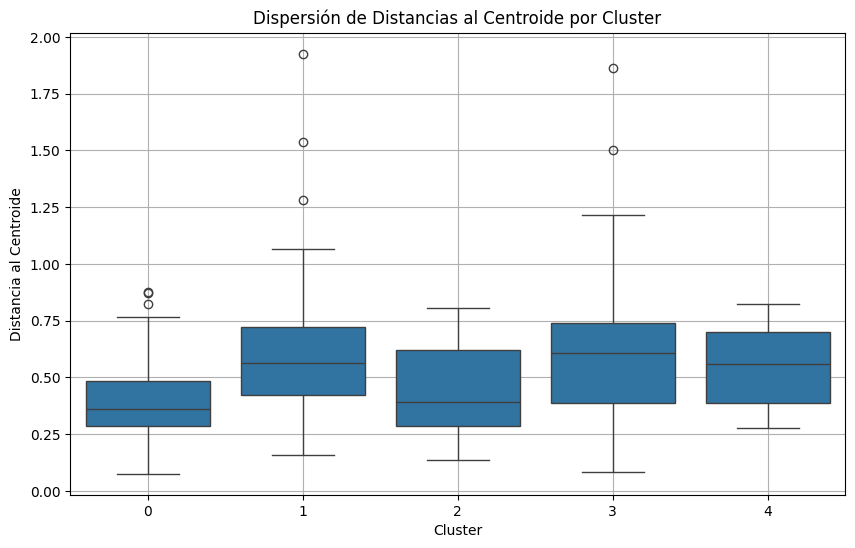

In [15]:
# Calcular la distancia de cada punto a su centroide
selected_data["Distancia al Centroide"] = [
    np.linalg.norm(point - kmeans.cluster_centers_[label])
    for point, label in zip(scaled_df.values, selected_data["Cluster"])
]

# Boxplot para analizar la dispersión dentro de cada cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Distancia al Centroide", data=selected_data)
plt.title("Dispersión de Distancias al Centroide por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Distancia al Centroide")
plt.grid()
plt.show()


Al observar el gráfico, encontramos lo siguiente:

- **Clusters mejor definidos:** El cluster 0 (azul) tiene la menor dispersión interna, lo que indica que sus puntos están bien agrupados alrededor del centroide. Un buen ejemplo de cohesión.
- **Clusters más dispersos:** Los clusters 1 (naranja) y 3 (rojo) tienen mayor dispersión y algunos outliers. Esto podría significar que contienen datos más diversos o que los centroides no capturan bien la estructura de estos grupos.

**Outliers:¿problema o oportunidad?**

Los outliers son valores atípicos que se salen del patrón general. Aunque pueden ser ruido en algunos análisis, en ocasiones esconden información valiosa. Investigar estos datos puede revelar anomalías interesantes o incluso subgrupos dentro de un cluster.

> **Nota:** Los outliers han llevado a descubrimientos inesperados en la historia. Por ejemplo, Alexander Fleming descubrió la penicilina al notar una "anomalía" en sus cultivos. Probablemente no descubramos algo tan revolucionario aquí... pero nunca se sabe🤷‍♂️

## 1.7. Conclusión

En este ejercicio, hemos explorado el clustering como una herramienta para mapear un territorio nuevo: el centro comercial y sus clientes. Cada cliente tiene su propio comportamiento, y al agruparlos en clusters, hemos identificado patrones claros, como si hubiéramos descubierto tribus únicas con hábitos y necesidades específicas.

Lo que logramos aquí es un "mapa del territorio". Cada cluster es un área de este mapa que nos ayuda a entender cómo se comportan los clientes. Sin embargo, como cualquier mapa, no captura toda la complejidad del terreno real. Para profundizar, podríamos incluir más variables y descubrir patrones más detallados.

El desafío ahora es usar este mapa sabiamente:
- Diseñar estrategias específicas para cada grupo.
- Identificar subgrupos o explorar puntos fuera de lo común.
- Recordar siempre que los datos contienen mucho más de lo que se ve a simple vista.